# 1.1 - Regression problem VS classification problem

Both regression and classification problems are supervised learning algorithims and both can be used with labelled datasets.
The biggest difference between the two is how they are used on different ML problems. For example when it comes to problems
where you want to know if something is true or if something is false, a classification algortihm works best to classify
them. It could also determine for example Male or female, 1 or 0, spam or not spam.
A regression algorithm is a bit more flexible in a sense. This algortihm is best used when faced with a problem
where you want to determine continous values, this could be for example age, income, price or time.

# 1.2 - What is "supervised learning"? 
Supervised learning in machine learning is defined by its use of labeled dataset to train different algorithms that are able to classify data or
predict different outcomes more accurately. When data is fed into the model, the algorithms adjusts its weights until everythinf has been fitted 
appropriately. This happends as part of the cross validation (CV) process.
With the help of supervised learning, problems that require some type of prediction or being able to classify if an email is spam or not
is much easier to scale up to actually impact real world problems.

# 1.2 - Examples and different use cases

The most common example of supervised learning, where you make use of classification algorithms such as linear classifiers or
support vector machines (SVM) to draw a conclusion if an email is spam or not spam. You can think of this example like if something
is either true or false, 1 or 0. If the email is classified as true, it will be labeled as spam, if its false it is not spam for example.
Under the hood the algorithm is trying to look for patterns from the data and draw a conclusion from it.
Another example is of regression problems. Here you can make use of algorihms such as linear regression or polynomial regression.
In a regression problem you are trying to look for and understand relationships between different independent and dependent variables.
This is normally used to be able to see sales projections for a business or to see how prices vary with different products.
Supervised learning is also used to do more complex tasks, such as image and object recognition.


There are many different modells and algorithms that you can use when doing supervised learning, these might incude neural networks, naive bayes, linear regression, logistic regression, support vector machines, k-nearest neighbor and random forests.

Random forests: Random forest is a very flexible machine learning algorithm. This algorithm can be used for both regression and classification problems.

Support Vector Machine (SVM): SVMs is also quite flexible when it comes to being able to be used for both regression and classification problems.
It does however perform better for classification problems where it creates a hyperplane and looks for where the distance between two data points
are the furthest away from each other.

Linear regression: This model is commonly used to identify relationship between two different variables, where as one is a depentent variable and
the other is an independent variable. Linear regression is looking for a plot line that fits the best. This can be found with the help of
calculating the least squares.

Logistic regression: Linear regression and logistic regression are similar in a sense that both are looking to understand the relationship
between the data inputs.
The main difference is that logistic regression is used when that variable is categorical. Which means that the variable have
binary outputs, 1 or 0, true or false.

# 1.2 - What is RMSE (Root Mean Square Error)?
RMSE is a mathematical formula that is used as a performance measure in machine learning. This performance measure is for the most part used
in regression problems. With the help of RMSE you can roughly get an idea of how much of an error the model makes in its predictions and with that information you can make a better informed decision of the accuracy or the overall usefulness of the model.

# 1.2 - What is a "Confusion Matrix"?
A confusion Matrix is also a way to look at how well your model is performing. What a confusion matrix does is it counts the amount of times an instance of
"class X" is classified as "class Z". Lets say that you have a dataset of numbers ranging from 1-5, you will get a 5x5 matrix.
In the matrix you are able to see how many times the model guessed wrong and thought for example that the number 2 when in fact it was number 1. You are
also able to see how many times the model guessed right, and with the help of a confusion matrix you can easily see on what and where the model is having trouble.

# 2 - Modell the MNIST data

In [31]:
# Imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from scipy.stats import reciprocal, uniform

In [3]:
mnist = fetch_openml("mnist_784", version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

c:\Users\Eric\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
# Look at what the dataset contains
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
# Trying to get a better overview of the data in the X variable
# with the help of pandas dataframes

print(type(X))
print(X.shape)


panda_df = pd.DataFrame(X).copy()
print(panda_df)
print(type(panda_df))
print(panda_df.shape)

<class 'numpy.ndarray'>
(70000, 784)
       0    1    2    3    4    5    6    7    8    9    ...  774  775  776  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
69995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
69996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
69997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
69998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
69999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       777  77

In [6]:
# Trying to get a better overview of the data in the y variable
# with the help of pandas dataframes


print(type(y))
print(y.shape)

panda_df_y = pd.DataFrame(y).copy()

print(panda_df_y)
print(type(panda_df_y))
print(panda_df_y.shape)

<class 'numpy.ndarray'>
(70000,)
       0
0      5
1      0
2      4
3      1
4      9
...   ..
69995  2
69996  3
69997  4
69998  5
69999  6

[70000 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
(70000, 1)


In [7]:
# Nothing really useful here except that you can see that number 1 is the most prevelant
# in the dataset
panda_df_y.value_counts(ascending=False)

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
dtype: int64

In [8]:
# Really hard to get anything from the X data
panda_df.value_counts(ascending=False)

0    1    2    3    4    5    6    7    8    9    10   11   12     13     14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40     41     42   43   44   45   46   47   48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64   65   66   67     68     69    70   71   72   73   74   75   76   77   78   79   80   81   82   83   84   85   86   87   88   89   90   91   92   93   94   95     96     97    98   99   100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121  122   123    124   125  126  127    128    129   130  131  132  133  134  135  136  137  138  139  140  141  142  143  144  145  146  147  148  149  150    151    152   153  154    155    156    157    158    159    160    161    162    163    164   165  166  167  168  169  170  171  172  173  174  175  176  177  178    179    180   181   182    183    184    185    186

In [9]:
# Splitting up the train and test data for X and Y
# Using this will significantly slow down train speed
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Scaling down the data to make the training faster
# This will most likley result in a worse outcome when being tested on the whole dataset
X_train = X[:5000]
y_train = y[:5000]
X_test = X[5000:6000]
y_test = y[5000:6000]

scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  


In [10]:
# Looking at the shape and lengths of the test and train sets
print("Train set X:",len(X_train), " - Y set:",len(y_train))
print("Test set X:",len(X_test), " - Y set:",len(y_test))

print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)

Train set X: 5000  - Y set: 5000
Test set X: 1000  - Y set: 1000
X_train shape: (5000, 784)
y_train shape: (5000,)
X_test shape: (1000, 784)
y_test shape: (1000,)


5


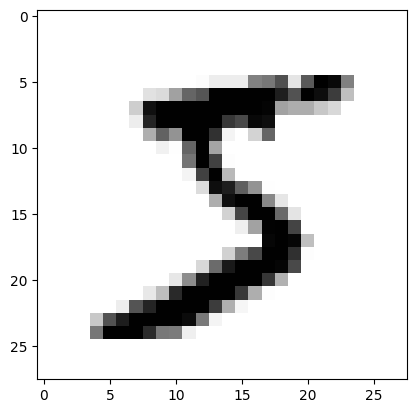

In [43]:
# Looking at the first y target as well as plotting the first X data
print(y[0])
digit_first = X[0]
digit_first_plot = digit_first.reshape(28,28)
plt.imshow(digit_first_plot, cmap=mpl.cm.binary)

In [15]:
# Trying the data on a LinearSVC
eval_model = LinearSVC(random_state=2)
eval_model.fit(X_train_scaled, y_train)

c:\Users\Eric\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=2)

In [18]:
# You can see that the model has a accuracy score of 0.845
predict_y_lin = eval_model.predict(X_test_scaled)
accuracy_score(y_test, predict_y_lin)

0.845

In [62]:
# Looking at how many of each number is in the y_test to be able to
# confirm that the confusion matrix looks right. This is easy on this data
# because i decided to cut away a large portion of the dataset
value_df_y_test = pd.DataFrame(y_test, index=range(1000), columns=range(1))
print(value_df_y_test.value_counts(ascending=False))

3    115
0    113
1    108
6    107
9    106
7    101
2     93
8     89
4     88
5     80
dtype: int64


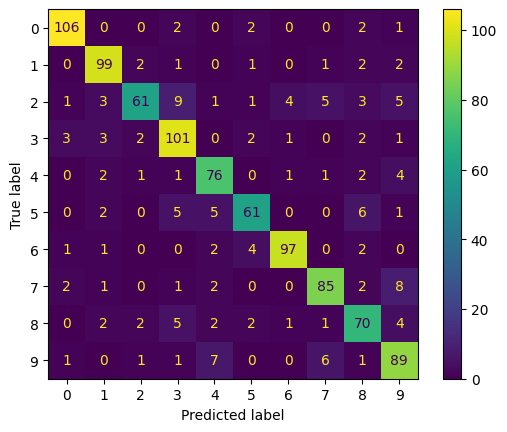

In [20]:
# Confusion matrix showing the predicted values vs the actual values
cm = confusion_matrix(y_test, predict_y_lin)
ConfusionMatrixDisplay(cm).plot()

In [24]:
# Creating a support vector classification
svm_clf = SVC()

In [25]:
# Setting up a grid search
hyper_param_grid = [ {"kernel": ["rbf", "poly"], "gamma":[0,1,2], "C": [0.5, 1, 1.5]}]
grid_search = GridSearchCV(svm_clf, hyper_param_grid, cv = 5)

In [26]:
# Fitting the grid search with train data
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 1.5], 'gamma': [0, 1, 2],
                          'kernel': ['rbf', 'poly']}])

In [59]:
# Best params for C = 0.5, this could be changed and try again with a lower value
# that might be able to get better results. Gamma = 1 and kernel = poly performed best.
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.5, 'gamma': 1, 'kernel': 'poly'}
0.9369999999999999


In [40]:
# Testing with the help of previous params from grid search to see
# how well the model does
grid_y_pred = grid_search.predict(X_test_scaled)
accuracy_score(y_test, grid_y_pred)

0.94

3    115
0    113
1    108
6    107
9    106
7    101
2     93
8     89
4     88
5     80
dtype: int64


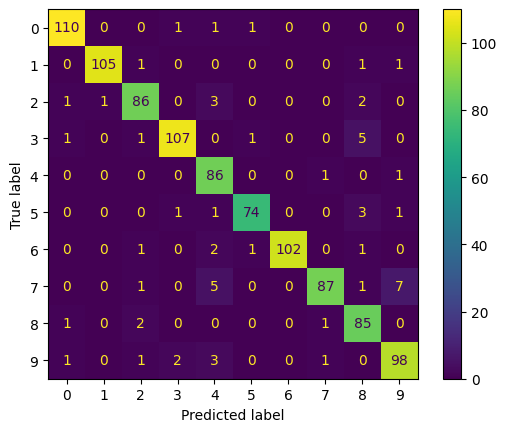

In [64]:
# Looking at the confusion matrix with the help of y_test and grid_y_pred params
# The accuracy score was 94%, and by looking at the matrix that
# looks reasonable.
cm = confusion_matrix(y_test, grid_y_pred)
ConfusionMatrixDisplay(cm).plot()

In [32]:
# Trying randomized search to see if better results can be achieved
hyper_param_distribution = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rand_search_cv = RandomizedSearchCV(svm_clf, hyper_param_distribution, n_iter=10, verbose=2, cv=3)

In [33]:
# Fitting the search with training data
rand_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=9.601593082233306, gamma=0.045768196243733725; total time=   3.9s
[CV] END ....C=9.601593082233306, gamma=0.045768196243733725; total time=   3.9s
[CV] END ....C=9.601593082233306, gamma=0.045768196243733725; total time=   3.9s
[CV] END ....C=3.504812154946985, gamma=0.047560861818503046; total time=   3.9s
[CV] END ....C=3.504812154946985, gamma=0.047560861818503046; total time=   3.9s
[CV] END ....C=3.504812154946985, gamma=0.047560861818503046; total time=   3.9s
[CV] END ...C=10.16075525175713, gamma=0.0018918221627558273; total time=   1.6s
[CV] END ...C=10.16075525175713, gamma=0.0018918221627558273; total time=   1.7s
[CV] END ...C=10.16075525175713, gamma=0.0018918221627558273; total time=   1.6s
[CV] END ....C=3.166703670284452, gamma=0.024512754242353347; total time=   3.7s
[CV] END ....C=3.166703670284452, gamma=0.024512754242353347; total time=   3.6s
[CV] END ....C=3.166703670284452, gamma=0.024512

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000024DC264D8D0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000024DC23CBCD0>},
                   verbose=2)

In [34]:
# Best params and the best score
print(rand_search_cv.best_params_)
print(rand_search_cv.best_score_)

{'C': 10.16075525175713, 'gamma': 0.0018918221627558273}
0.9131995929745624


In [35]:
# Testing the model and we see that this model has an accuracy score of just short
# of 94%.
rand_y_pred = rand_search_cv.predict(X_test_scaled)
accuracy_score(y_test, rand_y_pred)

0.938

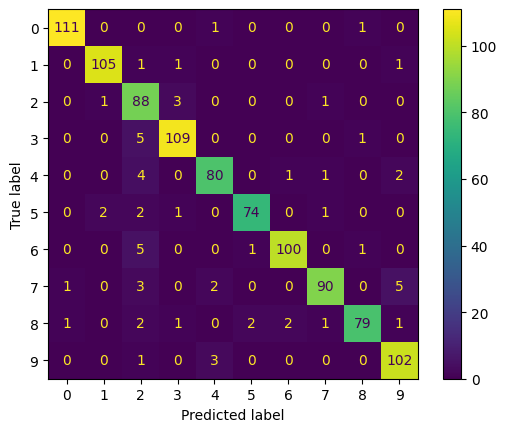

In [38]:
# Confusion matrix of the test data from random search
cm = confusion_matrix(y_test, rand_y_pred)
ConfusionMatrixDisplay(cm).plot()

All three models performed well, grid search stood above the rest where as LinearSVC fell behind a little bit. The difference between grid search and randomized search were not that significant.
If we however are only looking at the correct predictions on the number 5
randomized search and grid search perfromed equally and LinearSVC fell behind
quite a bit.
The number 9 seemed to be the one across all three models that confused the number 9 with number 7. LinearSVC made 8 such mistakes, grid search made 7 and lastly randomized search only made 5. 